<a href="https://colab.research.google.com/github/BYU-Hydroinformatics/ggst-notebooks/blob/main/climateserv_precip_vs_gwsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climateserv Precip vs Groundwater Storage

This notebook takes the imputed (and split) GWSa dataset and overlays the climateserv monthly precip data for plotting.

First, upload both files.

## Upload gap-filled CSV file

This is the file generated by the notebook that imputes the gaps in the the GWSa time series using a statistical analysis.

In [ ]:
# Upload CSV file containing GWSa file with gaps filled and split into
# original and imputed columns.

from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  gwsa_uploaded_file_name = fn
  print(f'User uploaded file "{fn}"')

Saving dr_completed_split.csv to dr_completed_split.csv
User uploaded file "dr_completed_split.csv"


## Upload Climatserv precip file

This is the monthly precip data downloaded from the Climatserv website in Excel format.

In [ ]:
# Upload XLSX file containing climateserv precip data on a monthly time scale.
# Before uploading, you may need to delete the extra row at the top.

from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  precip_uploaded_file_name = fn
  print(f'User uploaded file "{fn}"')

Saving dr_climateserv_2002-2024.xlsx to dr_climateserv_2002-2024.xlsx
User uploaded file "dr_climateserv_2002-2024.xlsx"


# Build combined dataframe

Import data in both files to make a single dataframe for use in plotting.

In [ ]:
import pandas as pd

# Import the GWSa CSV file
gwsa_df = pd.read_csv(gwsa_uploaded_file_name)

# Convert the 'date' column to datetime objects and set as index
gwsa_df['Date'] = pd.to_datetime(gwsa_df['Date'])
gwsa_df = gwsa_df.set_index('Date')

# Import the precip Excel file
precip_df = pd.read_excel(precip_uploaded_file_name)

# Convert the 'date' column to datetime objects and set as index
precip_df['DateTime'] = pd.to_datetime(precip_df['DateTime'])
precip_df = precip_df.set_index('DateTime')

# Merge the two dataframes based on the date index
merged_df = pd.merge(gwsa_df, precip_df, left_index=True, right_index=True)

# rename columns
merged_df = merged_df.rename(columns={"ts": "gwsa"})
merged_df = merged_df.rename(columns={"UCSB CHIRPS Rainfall: avg": "precip"})

# Display the merged dataframe
display(merged_df.head())

,gwsa,original,imputed,precip
Date,,,,
2002-04-01,1.015000,1.015,NaN,8.436776
2002-05-01,-1.295000,-1.295,-1.295000,3.586813
2002-06-01,-3.064452,NaN,-3.064452,3.049756
2002-07-01,-0.848320,NaN,-0.848320,2.873789
2002-08-01,-3.858000,-3.858,-3.858000,4.518491


In [ ]:
# Precip units are in monthly average of daily precip in [mm]. Convert to monthly total values in [cm].

# Multiply the 'precip' column by the number of days in each month
merged_df['precip'] = merged_df['precip'] * merged_df.index.daysinmonth

# Convert from mm to cm (1 cm = 10 mm)
merged_df['precip'] = merged_df['precip'] / 10

# Display the updated dataframe
display(merged_df.head())

,gwsa,original,imputed,precip
Date,,,,
2002-04-01,1.015000,1.015,NaN,25.310327
2002-05-01,-1.295000,-1.295,-1.295000,11.119121
2002-06-01,-3.064452,NaN,-3.064452,9.149267
2002-07-01,-0.848320,NaN,-0.848320,8.908747
2002-08-01,-3.858000,-3.858,-3.858000,14.007323


# Plot merged data

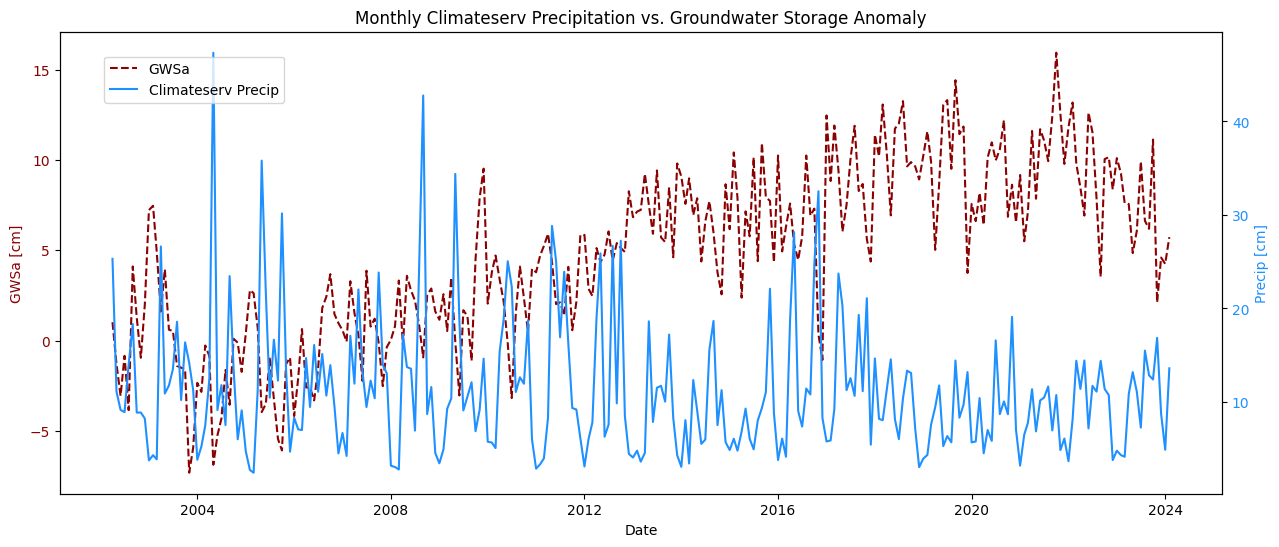

In [ ]:
import matplotlib.pyplot as plt

# Create the time series plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot GWSa data on the left y-axis
ax1.plot(merged_df.index, merged_df['gwsa'], label='GWSa', color='darkred', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('GWSa [cm]', color='darkred')
ax1.tick_params(axis='y', labelcolor='darkred')


# Create a second y-axis for precipitation data
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['precip'], label='Climateserv Precip', color='dodgerblue', linestyle='-')
ax2.set_ylabel('Precip [cm]', color='dodgerblue') # Changed label color
ax2.tick_params(axis='y', labelcolor='dodgerblue') # Changed tick color

# Add title and legend
plt.title('Monthly Climateserv Precipitation vs. Groundwater Storage Anomaly')
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))


# export plot to png in 300 dpi
plt.savefig('precip_vs_gwsa.png', dpi=300)

plt.show()

# Add Moving Average to smooth plot

In [ ]:
# @title Gaussian Moving Average Plot
years = 5 # @param {"type":"integer","placeholder":"3"}

months = years * 12

merged_df['gwsa_ma'] = merged_df['gwsa'].rolling(window=months, win_type='gaussian', center=True).mean(std=months/6)
merged_df['precip_ma'] = merged_df['precip'].rolling(window=months, win_type='gaussian', center=True).mean(std=months/6)

merged_df.head(20)

,gwsa,original,imputed,precip,gwsa_ma,precip_ma
Date,,,,,,
2002-04-01,1.015000,1.015,NaN,25.310327,NaN,NaN
2002-05-01,-1.295000,-1.295,-1.295000,11.119121,NaN,NaN
2002-06-01,-3.064452,NaN,-3.064452,9.149267,NaN,NaN
2002-07-01,-0.848320,NaN,-0.848320,8.908747,NaN,NaN
2002-08-01,-3.858000,-3.858,-3.858000,14.007323,NaN,NaN
2002-09-01,4.106000,4.106,NaN,18.332987,NaN,NaN
2002-10-01,1.271000,1.271,NaN,8.862890,NaN,NaN
2002-11-01,-0.954000,-0.954,NaN,8.873651,NaN,NaN
2002-12-01,1.998000,1.998,NaN,8.230628,NaN,NaN


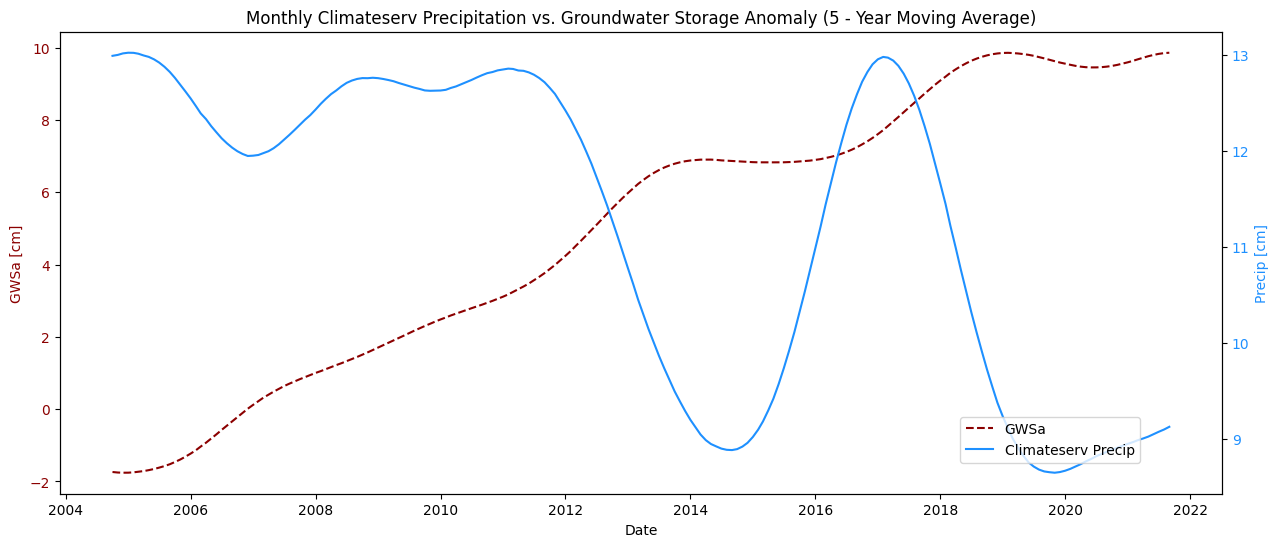

In [ ]:
# Create the time series plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot GWSa data on the left y-axis
ax1.plot(merged_df.index, merged_df['gwsa_ma'], label='GWSa', color='darkred', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('GWSa [cm]', color='darkred') # Changed label color
ax1.tick_params(axis='y', labelcolor='darkred') # Changed tick color
#ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.5)
# ax1.axhline(0, color='black', linestyle='--', linewidth=1.5)

# Create a second y-axis for precipitation data
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['precip_ma'], label='Climateserv Precip', color='dodgerblue', linestyle='-')
ax2.set_ylabel('Precip [cm]', color='dodgerblue') # Changed label color
ax2.tick_params(axis='y', labelcolor='dodgerblue') # Changed tick color


# Add title and legend
plt.title(f'Monthly Climateserv Precipitation vs. Groundwater Storage Anomaly ({years} - Year Moving Average)')
fig.legend(loc="lower right", bbox_to_anchor=(0.85, 0.15)) # manually adjust


# export plot to png in 300 dpi
plt.savefig(f'precip_vs_gwsa_moving_ave ({years}-yr).png', dpi=300)

plt.show()